#### **1. IMPORTING REQUIRED LIBRARIES**

In [292]:
# Importing necessary libraries for data manipulation, visualization, and modeling

import pandas as pd # For data manipulation and analysis.
import matplotlib.pyplot as plt # For creating data visualizations.
import seaborn as sns  # Library for statistical data visualization
import numpy as np # For numerical operations and array manipulation.
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For encoding categorical features and scaling numerical data.
from sklearn.compose import make_column_transformer # For applying transformations to specified columns in a DataFrame.
from scipy import stats  # For statistical functions, including Z-score calculations.

#### **2. IMPORTING THE SUPERMARKET DATASET**

In [293]:
# Loading the raw dataset into a pandas DataFrame
data = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\submission\\processed_train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [294]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [295]:
# Checking for missing values in the dataset
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### **4. FEATURE DERIVATION**

In [296]:
# Creating a new column 'Outlet_age' to calculate the store's age based on its establishment year
data['Outlet_age'] = 2024 - data['Outlet_Establishment_Year']

# Deriving a new feature: 'sales_per_mrp' by dividing Item_Outlet_Sales by Item_MRP
# This step handles potential division by zero by replacing zero values with 1
data['sales_per_mrp'] = data['Item_Outlet_Sales'] / data['Item_MRP'].replace(0, 1)  # Replace 0 with 1 to avoid division by zero

print(data[['Outlet_Establishment_Year', 'Outlet_age','Item_Outlet_Sales', 'Item_MRP', 'sales_per_mrp']].head())

   Outlet_Establishment_Year  Outlet_age  Item_Outlet_Sales  Item_MRP  \
0                       1999          25          3735.1380  249.8092   
1                       2009          15           443.4228   48.2692   
2                       1999          25          2097.2700  141.6180   
3                       1998          26           732.3800  182.0950   
4                       1987          37           994.7052   53.8614   

   sales_per_mrp  
0      14.951963  
1       9.186454  
2      14.809346  
3       4.021967  
4      18.467868  


In [297]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age', 'sales_per_mrp'],
      dtype='object')

In [298]:
# Shape of the data in rows & columns

rows, columns = data.shape

print("Total number of rows:", rows)
print("Total number of columns:", columns)

Total number of rows: 8523
Total number of columns: 14


#### **5. CATEGORICAL VARIABLE ENCODING**

In [299]:
from category_encoders import TargetEncoder  # Importing target encoding library

# Columns with high cardinality
high_cardinality_columns = ['Item_Identifier', 'Outlet_Identifier']
target_encoder = TargetEncoder(cols=high_cardinality_columns)
data = target_encoder.fit_transform(data, data['Item_Outlet_Sales'])

# Identifying categorical and numerical columns for encoding and scaling
nominal_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
ordinal_columns = ['Outlet_Size']
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [300]:
# Mapping for ordinal encoding of the 'Outlet_Size' column
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [301]:
ohe = OneHotEncoder(drop='first', sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [302]:
# Column transformer to apply different transformations to different column types
ct = make_column_transformer(
    (ohe, nominal_columns),  # Nominal columns
    (ode, ordinal_columns),  # Ordinal column
    (scaler, numerical_columns),  # Numeric columns
    remainder='passthrough'
)

ct.set_output(transform='pandas')  # Ensures the output is a DataFrame
df_encoded = ct.fit_transform(data)

In [303]:
# Cleaning up column names to remove the transformer prefix
df_encoded.columns = [col.replace("onehotencoder__", "")
                             .replace("ordinalencoder__", "")
                             .replace("standardscaler__", "")
                             .replace("remainder__","")
                             for col in df_encoded.columns]

print("Encoded Columns:\n", df_encoded.columns.tolist())

Encoded Columns:
 ['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_age', 'sales_per_mrp']


In [304]:
df_encoded.columns

Index(['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight',
       'Item_Visibility', 'Item_MRP', 'Item_Identifier', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_age',
       'sales_per_mrp'],
      dtype='object')

In [305]:
df_encoded.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,sales_per_mrp
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.828408,-0.970732,1.747454,2879.598286,2348.354635,1999,3735.1380,25,14.951963
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.625364,-0.908111,-1.489023,1920.354050,1995.498739,2009,443.4228,15,9.186454
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.105037,-0.956917,0.010040,2030.685308,2348.354635,1999,2097.2700,25,14.809346
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.505873,-1.281758,0.660050,2347.410648,339.351662,1998,732.3800,26,4.021967
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,-0.915649,-1.281758,-1.399220,1879.152033,2298.995256,1987,994.7052,37,18.467868


In [306]:
# Displaying the shape of the encoded DataFrame
rows, columns = df_encoded.shape
print("Total number of rows after encoding:", rows)
print("Total number of columns after encoding:", columns)

Total number of rows after encoding: 8523
Total number of columns after encoding: 31


#### **6. OUTLIER TREATMENT**

Item_Weight: 0 outliers detected.
Item_Visibility: 146 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 197 outliers detected.


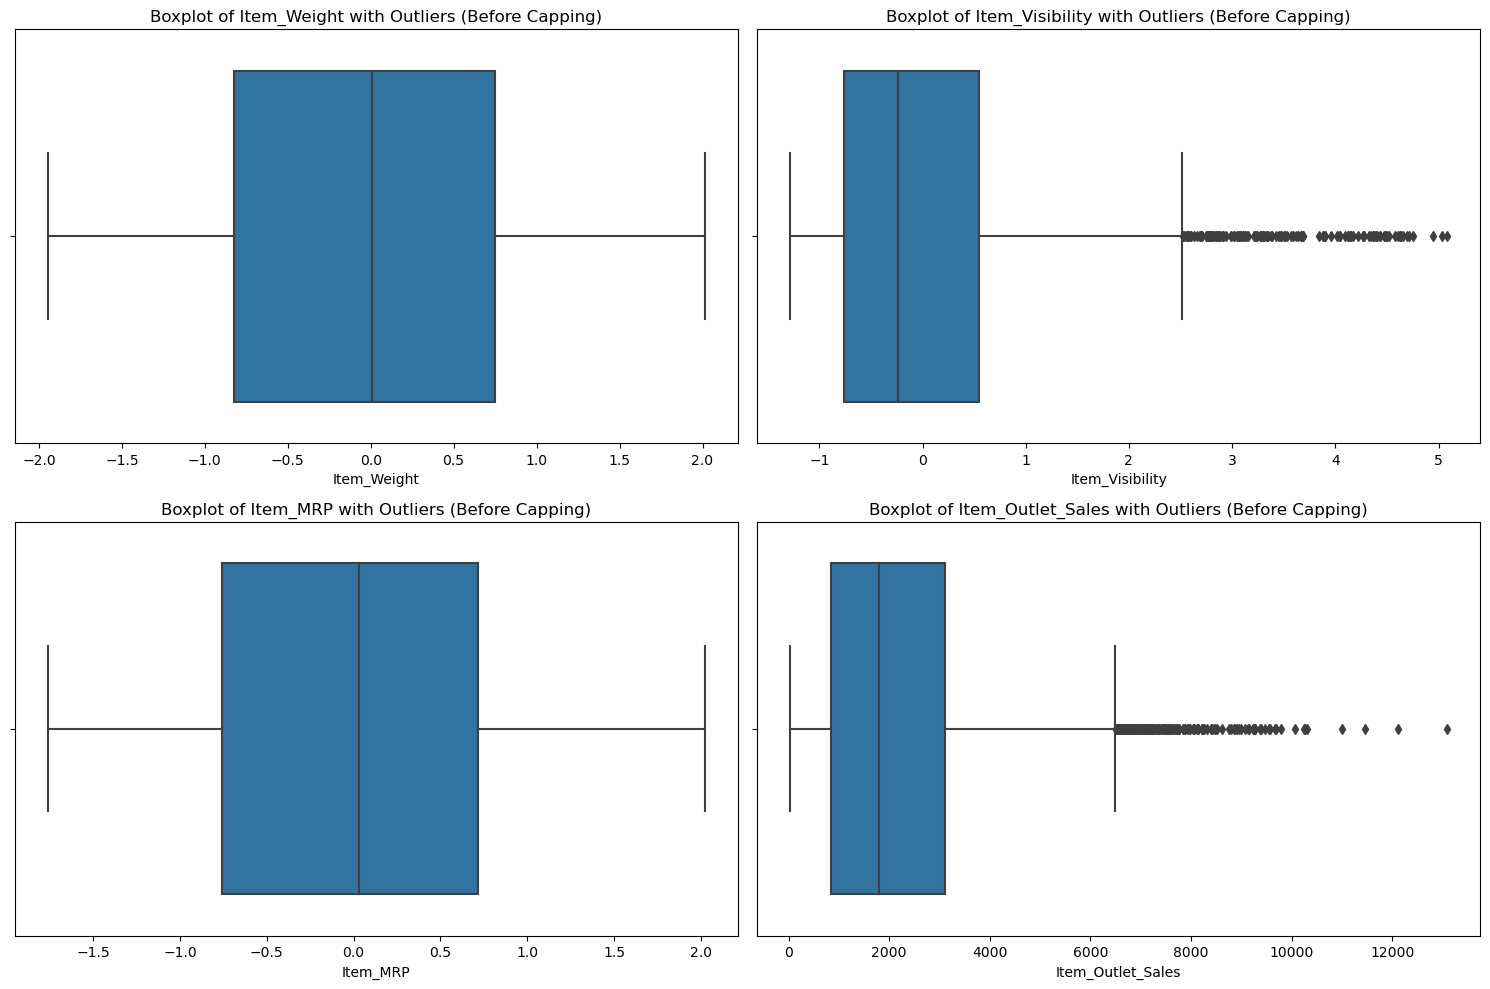

In [307]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous numerical features for outlier detection
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Defining Z-score threshold for outlier detection
z_threshold = 2.5 # as 3 results with 0 outliers & 2 with many so fixed T as 2.5

# Dictionary to store detected outliers
outliers_dict = {}

# Step 1: Calculate Z-scores and identify outliers
for col in continuous_columns:
    df_encoded[col + '_zscore'] = np.abs((df_encoded[col] - df_encoded[col].mean()) / df_encoded[col].std())  # Calculate Z-scores
    outliers_dict[col] = df_encoded[df_encoded[col + '_zscore'] > z_threshold]  # Store outliers
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")

# Visualize the boxplots before capping (to check outliers)
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_encoded[col])  # Boxplot to visualize data before capping
    plt.title(f'Boxplot of {col} with Outliers (Before Capping)')
plt.tight_layout()
plt.show()

Item_Weight: 0 outliers capped.
Item_Visibility: 0 outliers capped.
Item_MRP: 0 outliers capped.
Item_Outlet_Sales: 0 outliers capped.


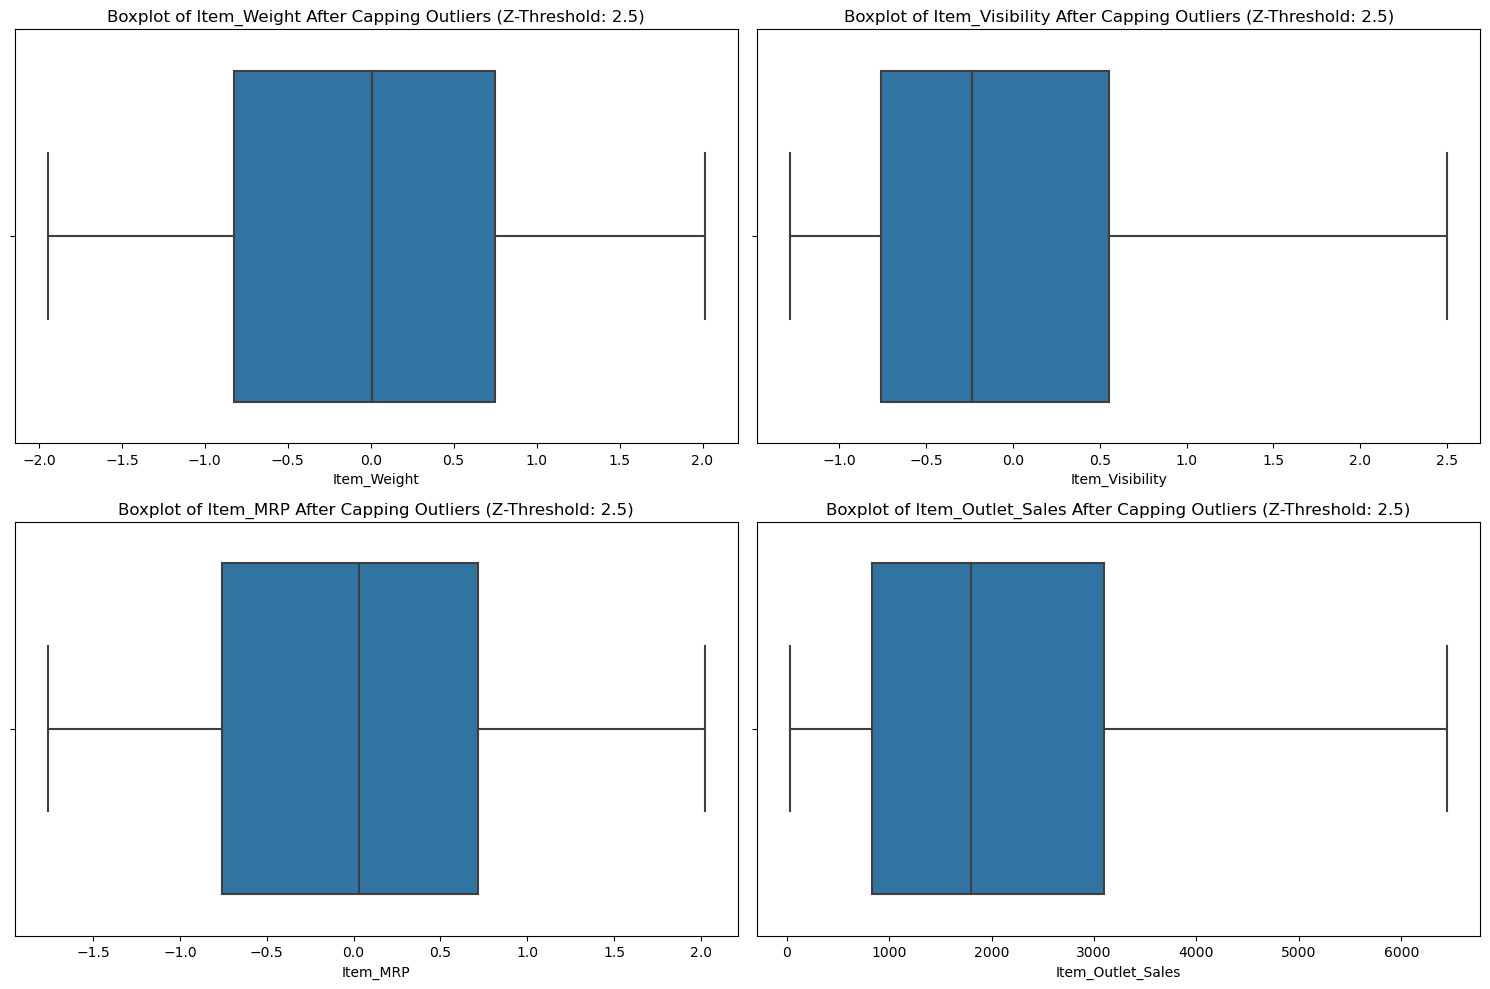

In [308]:
for col in continuous_columns:
    # Calculate the upper and lower bounds for capping
    upper_bound = df_encoded[col].mean() + z_threshold * df_encoded[col].std()
    lower_bound = df_encoded[col].mean() - z_threshold * df_encoded[col].std()

    # Cap values above the upper bound and below the lower bound
    df_encoded[col] = np.where(df_encoded[col] > upper_bound, upper_bound,
                               np.where(df_encoded[col] < lower_bound, lower_bound, df_encoded[col]))

    # Check how many values were capped (optional print)
    capped_outliers = df_encoded[(df_encoded[col] > upper_bound) | (df_encoded[col] < lower_bound)].shape[0]
    print(f"{col}: {capped_outliers} outliers capped.")

# Visualize the boxplots after capping (to see the effect)
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_encoded[col])  # Boxplot to visualize data after capping
    plt.title(f'Boxplot of {col} After Capping Outliers (Z-Threshold: {z_threshold})')
plt.tight_layout()
plt.show()

#### **7. FEATURE SCALING**

In [309]:
# Applying Min-Max Scaling to specific numerical features
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()  # Initializing Min-Max Scaler
df_encoded[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(df_encoded[['Item_MRP', 'Item_Visibility']])

# Displaying the scaled data
df_encoded[['Item_MRP', 'Item_Visibility']].head()  # Checking the scaled values for 'Item_MRP' and 'Item_Visibility'


,Item_MRP,Item_Visibility
0,0.927507,0.082240
1,0.072068,0.098799
2,0.468288,0.085893
3,0.640093,0.000000
4,0.095805,0.000000


### **8. STORING OUR NUMERICAL DATASET**

In [310]:
df_encoded.to_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\submission\\df_cleaned.csv', index=False)

 Visualizing the distribution of 'Item_Outlet_Sales' and applying log transformation to reduce skewness, followed by re-evaluating the transformed distribution.


#### **9. VISUALIZING THE DISTRIBUTION OF 'Item_Outlet_Sales' AND APPLYING LOG TRANSFORMATION**

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

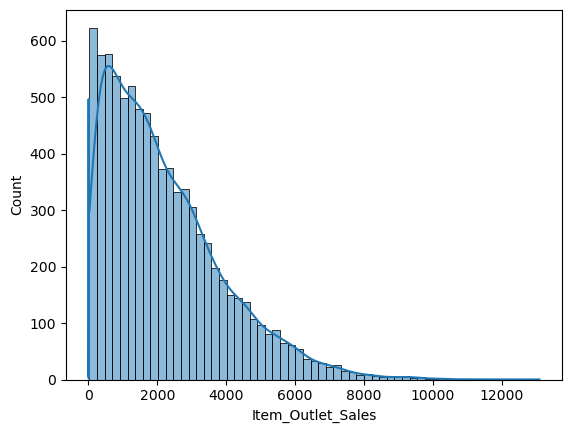

In [311]:
# Investigating the distribution of 'Item_Outlet_Sales'
sns.histplot(data['Item_Outlet_Sales'], kde=True)  # Plotting the histogram with KDE for 'Item_Outlet_Sales'

# Applying log transformation to reduce skewness in the 'Item_Outlet_Sales' distribution
data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])  # log1p for log(1 + x)

# Checking the distribution after applying the log transformation
sns.histplot(data['Item_Outlet_Sales_Log'], kde=True)  # Plotting the histogram with KDE for log-transformed data
